## HASS CONSULTING COMPANY REAL ESTATE SALE PRICE PREDICTION

## Defining the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## Specifying the Question

1. **Study the factors that affect housing prices using information on real estate properties**
2. **Model that would allow the company accurately predict the sale of prices**

## Defining the metric of success

1. Optimal and reliable prediction Model of the sale of prices
2.  80% Accuracy score of the four models that I will use in prediction
3. With the least RMSE score achievable

## Understanding the Context

Hass Consulting Company  is a real estate leader with over 25 years of experience.As a data scientist, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## Experimental design taken


1. Perform EDA which involves univariate, bivariate and multivariate analysis
2. Check for multicollinearity and plot residual plots
3. Build regression models i.e
i. Multiple Linear Regression
ii. Quantile Regression
iii. Ridge Regression
iv. Lasso Regression
v. Elastic Net Regression
While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 
4. Challenge your solution by providing insights on how you can make improvements in model improvement.



## Appropriateness of Data

One  datasets is provided by the consulting company:



The dataset and glossary to use for this project can be found here<a href="http://bit.ly/IndependentProjectWeek7Dataset"> Datasets</a>

## Reading the Data

#### Importing Relevant libraries

In [1]:
import pandas_profiling as pp
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the housing data and its dictionary

In [2]:
housing=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
dictionary=pd.read_excel("/content/dictionary.xlsx")

In [3]:
## Previewing the first five rows
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
##previewing the last five rows 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
##previewing my dictionary 
dictionary

,COLUMN,DESCRIPTION
0,Id,Id of the house
1,price,Price of the house
2,bedrooms,Number of Bedrooms
3,bathrooms,Number of Bathrooms
4,sqft_living,Square feet area of living area
5,sqft_lot,Square feet area of parking Layout
6,floors,Number of Floors
7,waterfront,Whether waterfront is there or not
8,view,Number of Views
9,grade,Grades


## Data Exploration

In [6]:
## Previewing the size of our housing dataframe
housing.shape
###there are 21613 rows and 20 columns.

(21613, 20)

In [7]:
##previwing our column data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Data Cleaning

In [8]:
##Before doing any data cleaning,,,its a good practice to make a copy of the dataset so that when you make any mistake you can just revert to the original copy
housing_new=housing.copy()
housing_new.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
##checking for null values
housing_new.isnull().sum()
##Bam!! Our dataframe does not have missing value 

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
## checking for duplicates
housing_new.duplicated().value_counts()
##With only 3 duplicates, that wont affect our model so we drop the duplicated value..double bam!!


housing_new.drop_duplicates(keep='first',inplace = True)
print("housing", housing_new.shape)
housing_new.duplicated().sum()
## 

housing (21610, 20)


0

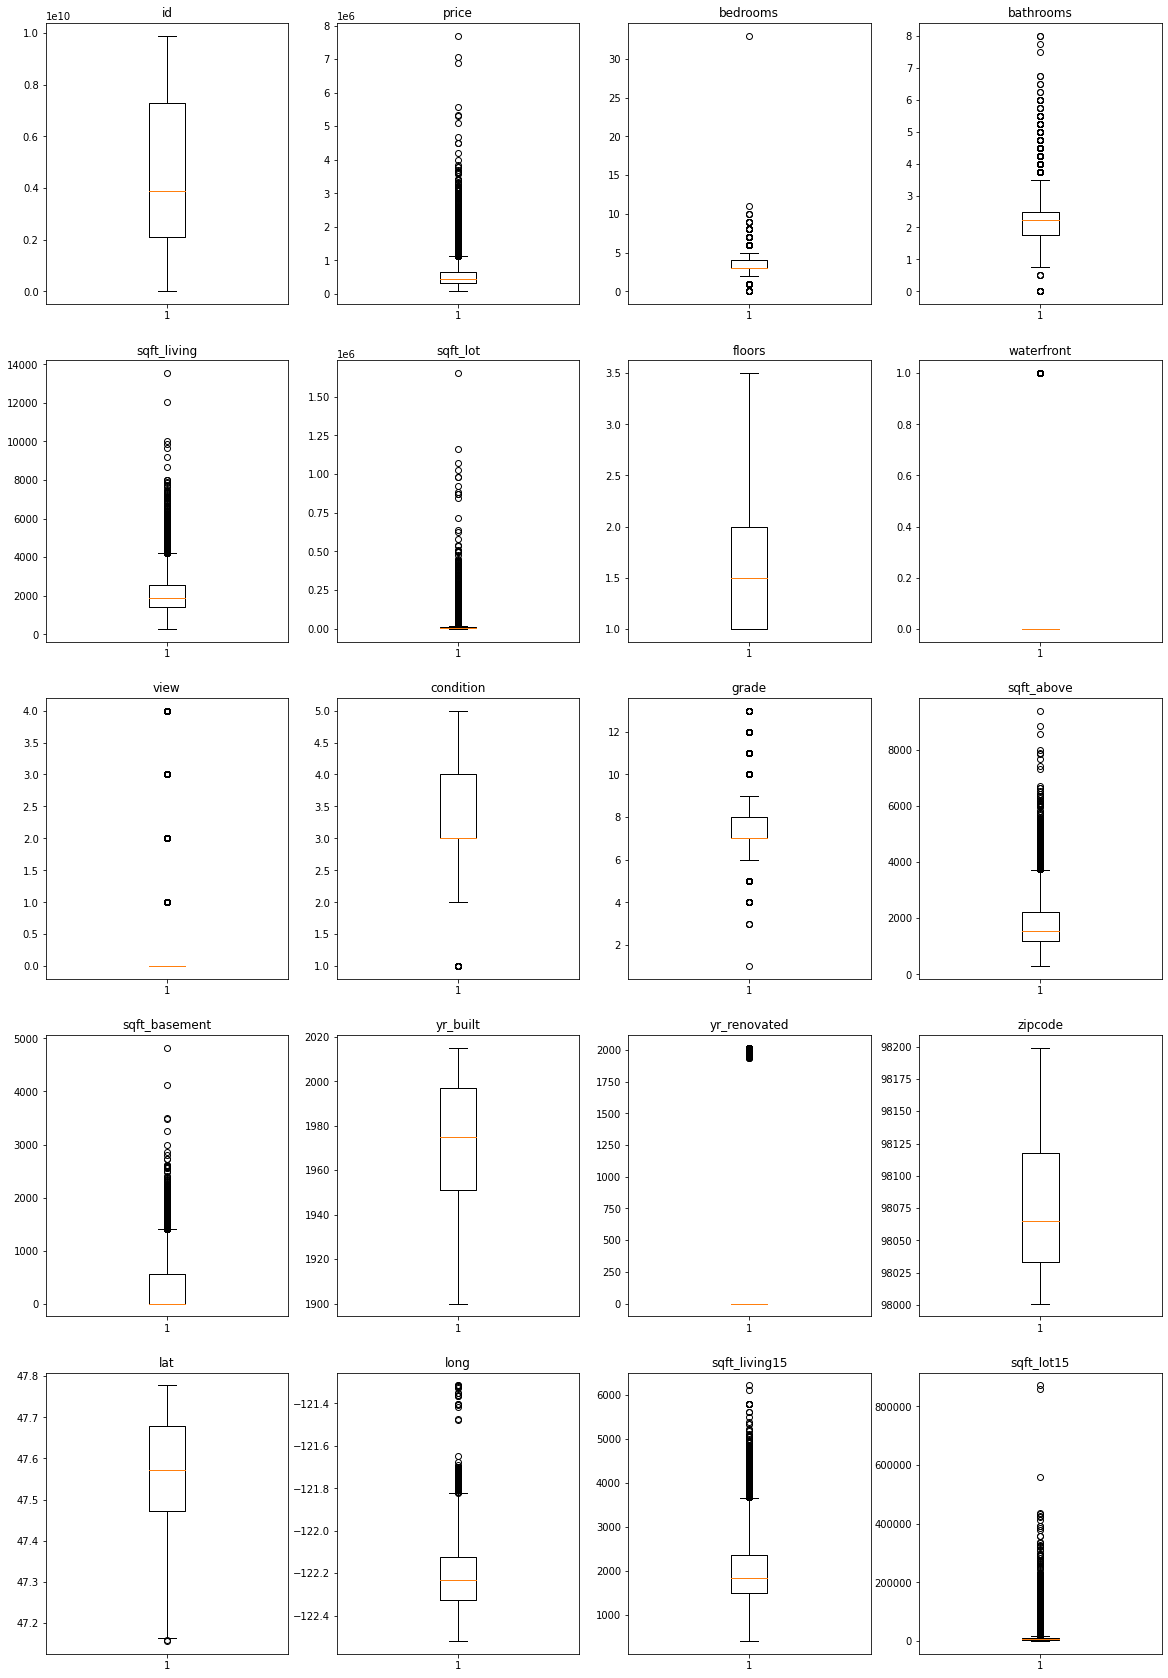

In [11]:
## checking for outliers
columns_dict={ 'id':1, 'price':2, 'bedrooms':3, 'bathrooms':4, 'sqft_living':5, 'sqft_lot':6,
       'floors':7, 'waterfront':8, 'view':9, 'condition':10, 'grade':11, 'sqft_above':12,
       'sqft_basement':13, 'yr_built':14, 'yr_renovated':15, 'zipcode':16, 'lat':17, 'long':18,
       'sqft_living15':19, 'sqft_lot15':20}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(housing_new[variable])
  plt.title(variable)
plt.show()
##There are outliers in our dataframe but we wont drop them as they play an important role in model prediction

In [12]:
## checking for anomalies in the housing dataset
housing_new.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Univariate Analysis

In [13]:
housing_new.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
dictionary

,COLUMN,DESCRIPTION
0,Id,Id of the house
1,price,Price of the house
2,bedrooms,Number of Bedrooms
3,bathrooms,Number of Bathrooms
4,sqft_living,Square feet area of living area
5,sqft_lot,Square feet area of parking Layout
6,floors,Number of Floors
7,waterfront,Whether waterfront is there or not
8,view,Number of Views
9,grade,Grades


In [15]:
housing_new['price'].describe()

count    2.161000e+04
mean     5.401789e+05
std      3.673876e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


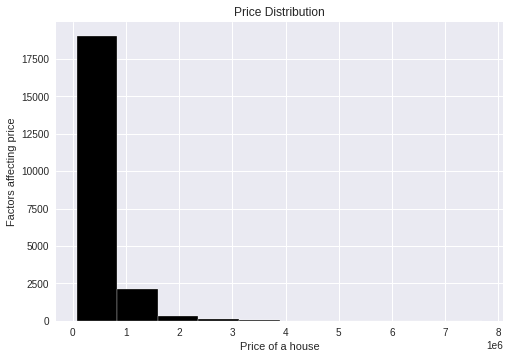

In [16]:
#Lets start off by focusing on the price  since its the target variable. 
import seaborn as sns
sns.set(font_scale = 2)
%pylab


figsize(8, 8)
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize



# Histogram of the Energy Star Score
plt.style.use('seaborn')
plt.hist(housing_new['price'], color = 'black');
plt.xlabel('Price of a house'); plt.ylabel('Factors affecting price'); 
plt.title('Price Distribution');

In [17]:
housing_new['price'].sort_values(ascending=False).head()
####the highest price of a house is 7700000.0.

7252    7700000.0
3914    7060000.0
9254    6890000.0
4411    5570000.0
1448    5350000.0
Name: price, dtype: float64

In [18]:
##Finding the summary statistic of the housing dataframe
housing_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:

housing_new.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


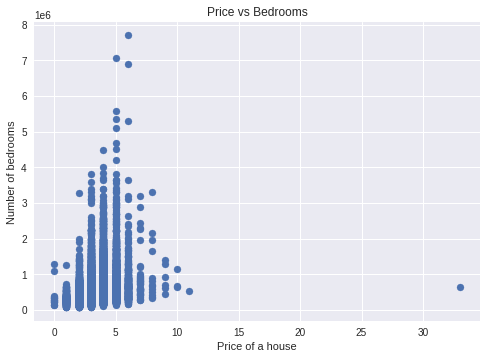

In [20]:
## Bivariate Analysis
##a scatter plot between the price  and clearfell bathrooms

plt.scatter(housing_new['bedrooms'], housing_new['price'])

#Giving our scatterplot a title
plt.title('Price vs Bedrooms')

# Labelling our x axis
plt.xlabel('Price of a house')

#Labelling our y axis
plt.ylabel('Number of bedrooms')

# Displaying our scatterplot
plt.show()


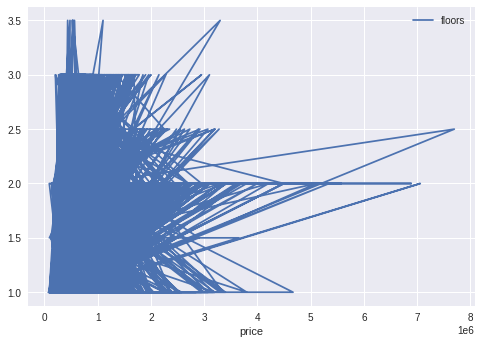

In [21]:
housing_new.plot(x='price', y='floors')


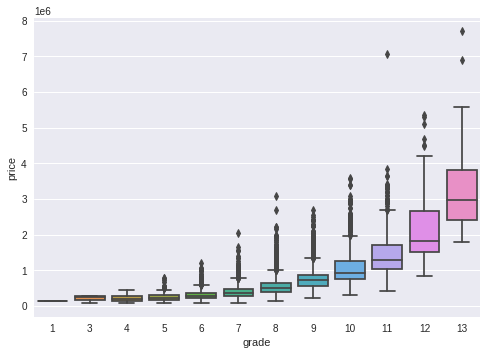

In [22]:
##boxplot
sns.boxplot(x="grade", y="price", data=housing_new)
plt.show()


**Multivariate Analysis**

---



---



In [23]:
housing_new.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
##finding the correlation matrix of our features
housing_new.drop(['id', 'zipcode'], axis=1,inplace=True)


In [25]:
housing_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

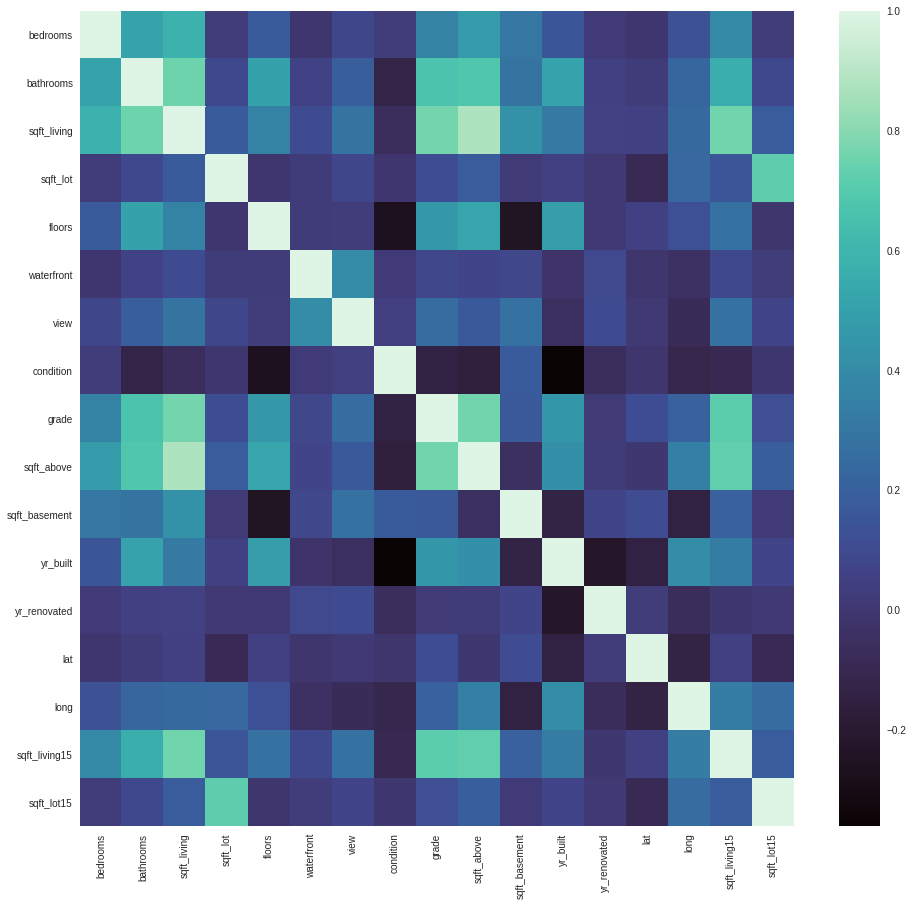

In [26]:
### correlation 
fig,ax=plt.subplots(figsize=(16,15))
ax=sns.heatmap(housing_new.drop(['price'], axis=1).corr(),annot=False,cmap='mako') 

Feature Engineering

In [27]:
# Find all correlations and sort 
correlations_data = housing_new.corr()['price'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

long            0.021567
condition       0.036397
yr_built        0.053980
sqft_lot15      0.082457
sqft_lot        0.089658
yr_renovated    0.126503
floors          0.256793
waterfront      0.266332
lat             0.306922
bedrooms        0.308346
Name: price, dtype: float64 

lat              0.306922
bedrooms         0.308346
sqft_basement    0.323849
view             0.397466
bathrooms        0.525140
sqft_living15    0.585382
sqft_above       0.605569
grade            0.667478
sqft_living      0.702046
price            1.000000
Name: price, dtype: float64


In [28]:
features = housing_new.copy()


All features aren't equal. It is all about selecting a small subset of features from a large pool of features

In [29]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between price
    y = x['price']
    x = x.drop(columns = ['price'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['long', 
                          'condition ',
                          'yr_built',
                          'sqft_lot15'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [ ]:
# Remove the collinear features above a specified correlation coefficient of 0.3
features = remove_collinear_features(features, 0.3);

In [33]:

features=housing_new[['lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','price']]
features.head()

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,price
0,47.5112,3,0,0,1.00,1340,1180,7,221900.0
1,47.7210,3,400,0,2.25,1690,2170,7,538000.0
2,47.7379,2,0,0,1.00,2720,770,6,180000.0
3,47.5208,4,910,0,3.00,1360,1050,7,604000.0
4,47.6168,3,0,0,2.00,1800,1680,8,510000.0


Machine Learning

Multiple Linear Regression

In [34]:
features.head()

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,price
0,47.5112,3,0,0,1.00,1340,1180,7,221900.0
1,47.7210,3,400,0,2.25,1690,2170,7,538000.0
2,47.7379,2,0,0,1.00,2720,770,6,180000.0
3,47.5208,4,910,0,3.00,1360,1050,7,604000.0
4,47.6168,3,0,0,2.00,1800,1680,8,510000.0


In [35]:
X=features[['lat','bedrooms','sqft_basement','view', 'bathrooms','bathrooms','sqft_living15', 'sqft_above','sqft_above','grade'	]]
y=features['price']
# Use 30% of the data as test
# The rest will be our training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
##printing coefficients
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-31586410.832327228
[ 6.56468396e+05 -3.17500362e+04  2.05042358e+02  9.58598386e+04
 -5.18540634e+03 -5.18540634e+03  1.13775395e+01  9.37297172e+01
  9.37297172e+01  7.74142998e+04]


In [37]:

# Pairing the five features with their coefficients
list(zip(X, regressor.coef_))

[('lat', 656468.3958901534),
 ('bedrooms', -31750.036154078505),
 ('sqft_basement', 205.04235815118955),
 ('view', 95859.83857827648),
 ('bathrooms', -5185.406335156588),
 ('bathrooms', -5185.406335156701),
 ('sqft_living15', 11.377539475925005),
 ('sqft_above', 93.72971717193366),
 ('sqft_above', 93.72971716913969),
 ('grade', 77414.29977028113)]

In [38]:

#Making predictions and plotting residuals
y_pred = regressor.predict(X_test)
residuals = y_pred - y_test

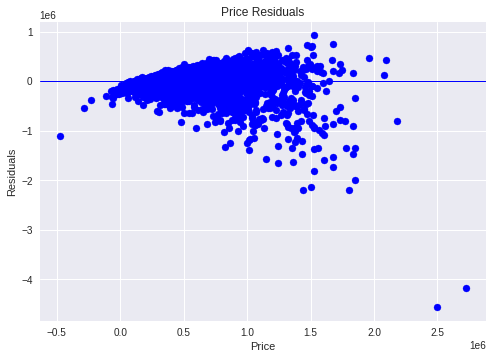

In [39]:

# Plotting residuals

plt.scatter(y_pred, residuals, color='blue')
plt.title('Price Residuals')
plt.ylabel('Residuals')
plt.xlabel('Price')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()

In [42]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import scipy as sc
from sklearn.preprocessing import StandardScaler
# Assessing Heteroskedasticity using barlett's test

test_result, p_value = sc.stats.bartlett(y_pred, residuals)

print("P-Value is ;",p_value )
print('Baseline MSE:', metrics.mean_squared_error(y_test, y_pred))
print("Mean Price is: ", features['price'].mean())
print('Baseline RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Printing the coefficients
print("++++++++++++++++++++++++++++++++")
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

P-Value is ; 1.399622078711102e-100
Baseline MSE: 50153134435.958305
Mean Price is:  540178.9448403517
Baseline RMSE: 223948.95497849127
++++++++++++++++++++++++++++++++


{'bathrooms': -5185.406335156701,
 'bedrooms': -31750.036154078505,
 'grade': 77414.29977028113,
 'lat': 656468.3958901534,
 'sqft_above': 93.72971716913969,
 'sqft_basement': 205.04235815118955,
 'sqft_living15': 11.377539475925005,
 'view': 95859.83857827648}

1. P value is less than 0.05 thus presence of heteroskedasticity 
2. our model has  RMSE which is greater than >10% of Mean Price, hence model is performing poorly and should be examined more
3. Residuals are not centered around the mean thus our model is not perfoming well


Quantile Regression

In [44]:

#Importing the Library

import statsmodels.regression.quantile_regression as Q_reg

In [47]:
features.head()

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,price
0,47.5112,3,0,0,1.00,1340,1180,7,221900.0
1,47.7210,3,400,0,2.25,1690,2170,7,538000.0
2,47.7379,2,0,0,1.00,2720,770,6,180000.0
3,47.5208,4,910,0,3.00,1360,1050,7,604000.0
4,47.6168,3,0,0,2.00,1800,1680,8,510000.0


In [58]:
import statsmodels.api as sm


#Creating X and y variables

X = features.iloc[:,7:8]
y = features.price


#Splitting our data and using 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

#Creating a function for Quantile Regression and an array with the 3 different quantiles

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
#Splitting our data and using 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

#Creating a function for Quantile Regression and an array with the 3 different quantiles

quantiles = [0.25, 0.5, 0.75]
# prepare the quantile that we want to work with
#quantile reg
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', features)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())
    

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2526
Model:                       QuantReg   Bandwidth:                   3.075e+04
Method:                 Least Squares   Sparsity:                    4.226e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21610
Time:                        17:35:01   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.96e+05   9473.130    -73.471      0.000   -7.15e+05   -6.77e+05
X           1.552e+05   1222.894    126.885      0.000    1.53e+05    1.58e+05


In [59]:

residual1 = mod.fit(q = 0.25)
residual3 = mod.fit(q = 0.5)
residual4 = mod.fit(q = 0.75)

# display the results 
print("25th Percentile: ", residual1.summary(), '\n++++++++++++++++++++++++++\n')
print("\n50th Percentile: ", residual3.summary(), '\n___________________________\n')
print("\n75th Percentile: ", residual4.summary())

25th Percentile:                           QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2055
Model:                       QuantReg   Bandwidth:                   2.663e+04
Method:                 Least Squares   Sparsity:                    4.405e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21610
Time:                        17:37:24   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.195e+05   7127.745    -86.914      0.000   -6.33e+05   -6.06e+05
X           1.308e+05    915.177    142.869      0.000    1.29e+05    1.33e+05
++++++++++++++++++++++++++


50th Percentile:                           QuantReg Regression Results              

In [60]:
##algorithm evaluation

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 319682.484479455
Mean Squared Error: 216580600689.54266
Root Mean Squared Error: 465382.2092533648


In [61]:

#R2 score
from sklearn.metrics import r2_score
q = r2_score(y_test, y_pred)
print(q)
###prediction accuracy of 62.48% is not quite bad

-0.6247493515454394


**Lasso Regression**

In [63]:
#Creating X and y variables
from sklearn import linear_model

X = features.iloc[:,7:8]
y = features.price

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the lasso model

lasso.fit(X, y) 

#Splitting into 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#specifying parameters
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [64]:
# Fitting Lasso model 
import warnings
warnings.filterwarnings("ignore")
gridlasso.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [65]:

#Predicting and printing the metrics

print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Mean Price is: ", features['price'].mean())
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
###RMSE scores have reduced meaning there is an improvement in our model

lasso score: 0.43269375142413924
lasso MSE: 72499913662.59315
Mean Price is:  540178.9448403517
lasso RMSE: 269258.08003213786
#################


{'grade': 208611.14544896875}

Ridge Regression


In [66]:
#Importing Libraries for Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X = features.iloc[:,7:8]
y = features.price
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
#Ridge Regression Model
#L2 or alpha is the name of the hyperparameter used in ridge regression. 
#It requires the use of a grid
#In ridge model we indicat normalization in order to get better estimates
#Refit set to true means to adjust the parameters while modeling 
#cv is the number of folds to develop for the cross-validation
#logspace means log of -5 to 2, but we only get 8 values from within that range evenly spread out
#Fitting the Ridge model and identifying the best parameters and scores for the model
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
print(abs(search.best_score_) )
print(search.best_params_)
# We can confirm this by fitting our model with the ridge information and finding the RMSE below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)


y_pred = ridge.predict(X)
print("Ridge score:", ridge.score(X, y))
print("Mean Price is: ", features['price'].mean())
print('Ridge MSE:', metrics.mean_squared_error(y, y_pred))
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
###RMSE has further reduced meaning that our model has increased,,,lets explore the elastic net regression and see

75020197618.61433
{'alpha': 0.001}
Ridge score: 0.44548380060051784
Mean Price is:  540178.9448403517
Ridge MSE: 74841605123.73648
Ridge RMSE: 273571.93774898857
#################


{'grade': 206546.40512456698}

***Elastic Net Regression***

In [69]:
from sklearn.linear_model import ElasticNet
X = features.iloc[:,7:8]
y = features.price
# Normalising Elastic Net Regression and creating our GridSearch

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# Fitting our model and displaying the best parameters and best results
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))
#The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 

elastic = ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)

#Printing the metrics after prediction

y_pred = elastic.predict(X)

print("Elastic score:", elastic.score(X, y))
print("Mean Price is: ", features['price'].mean())
print('Elastic MSE:', metrics.mean_squared_error(y, y_pred))
print('Elastic RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
###RMSE has increased indicating a slight misaccuraacy in our model...Ridge regression should therefore be used

{'alpha': 1e-05, 'l1_ratio': 0.8}
75086604620.3524
Elastic score: 0.4447627733449378
Mean Price is:  540178.9448403517
Elastic MSE: 74938920291.81274
Elastic RMSE: 273749.7402588955
#################


{'grade': 199969.19937821504}

Challenging  the Solution

Follow up questions

In [70]:
#We had the right data
##Other models should be accessed to ensure a better prediction
## We should more data that is not collinear to do our prediction